In [3]:
import zipfile
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from IPython.display import Audio
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC

C:\Users\valen\AppData\Local\Temp\ipykernel_20536\4277189437.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [12]:
data_dir = "./wav"

# Load and preprocess audio data using spectrograms
labels = os.listdir(data_dir)
audio_data = []
target_labels = []

emotion_map = {
    'W': 'anger',
    'L': 'boredom',
    'E': 'disgust',
    'A': 'fear',
    'F': 'happiness',
    'N': 'neutral',
    'T': 'sadness'
}

spectrogrammisé et labellé tt les fichiers audio

In [7]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveforms for sound in emotions{}'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # transformer de Fourier
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for sounds with emotions{}'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()
    
def create_mfcc(data,sr,e):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)
    plt.figure(figsize=(12,3))
    plt.title('Mel-frequency cepstral coefficients for voices with emotion{}'.format(e), size=15)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()

In [13]:
for audio_file in os.listdir(data_dir):
    """audio_path = os.path.join(data_dir, audio_file)
    y, sr = librosa.load(audio_path, duration=3)  # Load audio and limit to 3 seconds
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram = librosa.power_to_db(spectrogram, ref=np.max)"""
    # Transpose the spectrogram to have the shape (timesteps, n_mels)
    """spectrogram = spectrogram.T
    audio_data.append(spectrogram)"""
    speaker = audio_file[0:2]
    text_code = audio_file[2:6]
    emotion = audio_file[6]
    version = audio_file[7] if len(audio_file) > 7 else None
    label = f"{speaker}{text_code}{emotion}{version}"
    target_labels.append(label)

In [14]:
audio_file_tab = []
#construire le tableau des emotions:
emotion_tab = []
for i in range(len(target_labels)):
    emo = target_labels[i][5]
    emotion_tab.append(emotion_map[emo])
    audio_file_tab.append(os.path.join(data_dir, f'{target_labels[i]}wav'))
emotion_tab
print(emotion_tab)
print(audio_file_tab)
    

['happiness', 'neutral', 'anger', 'happiness', 'neutral', 'sadness', 'anger', 'anger', 'fear', 'happiness', 'boredom', 'neutral', 'sadness', 'anger', 'fear', 'happiness', 'neutral', 'sadness', 'anger', 'anger', 'happiness', 'happiness', 'boredom', 'neutral', 'anger', 'happiness', 'boredom', 'neutral', 'sadness', 'anger', 'anger', 'fear', 'boredom', 'neutral', 'sadness', 'anger', 'neutral', 'sadness', 'anger', 'boredom', 'neutral', 'sadness', 'anger', 'fear', 'disgust', 'neutral', 'neutral', 'anger', 'anger', 'fear', 'happiness', 'boredom', 'neutral', 'anger', 'anger', 'fear', 'fear', 'happiness', 'boredom', 'neutral', 'sadness', 'anger', 'happiness', 'boredom', 'neutral', 'sadness', 'anger', 'happiness', 'boredom', 'neutral', 'sadness', 'anger', 'happiness', 'boredom', 'neutral', 'sadness', 'sadness', 'anger', 'fear', 'happiness', 'happiness', 'boredom', 'neutral', 'anger', 'happiness', 'boredom', 'neutral', 'sadness', 'anger', 'happiness', 'boredom', 'neutral', 'sadness', 'anger', 'fe

## Rajouter du bruit

In [15]:
#BRUIT 
def noise(data,noise_rate=0.01):
    noise_amp = 0.01*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

#CHANGEMENT DE VITESSE
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

#DECALAGE TEMPOREL
def shift(data):
    shift_range = int(np.random.uniform(low=-15, high = 15)*1000)
    return np.roll(data, shift_range)

#CHANGER LA TONALITE
def pitch(data, sampling_rate, pitch_factor=2.0):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

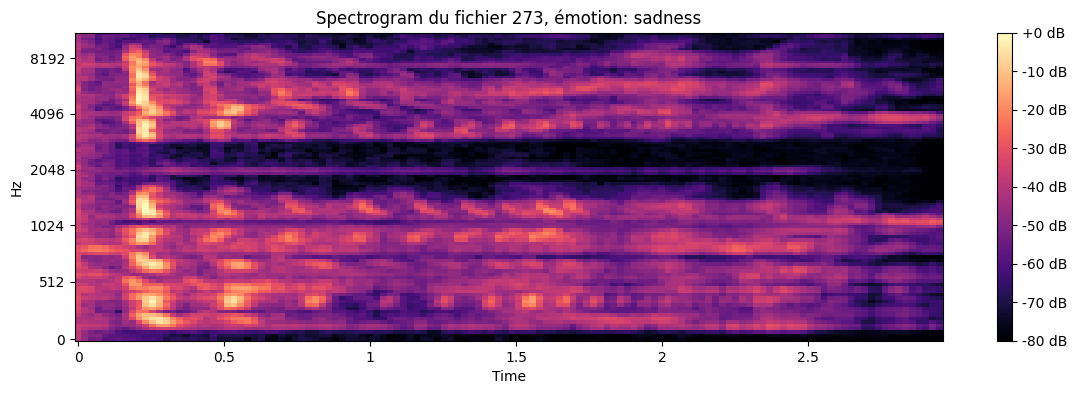

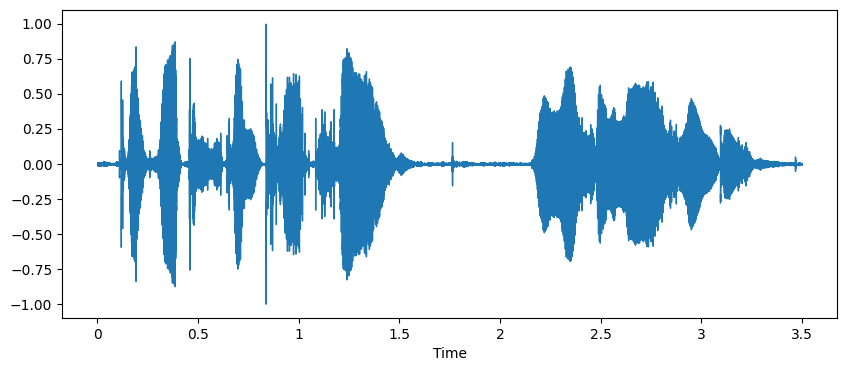

In [11]:
choix = random.randint(0, 534)

speaker0 = target_labels[choix][0:2]
emotion0 = emotion_tab[choix]

audio_file0 = os.path.join(data_dir, f'{target_labels[choix]}wav')
data0, sample_rate = librosa.load(audio_file0, sr=None)
spectrogram = librosa.feature.melspectrogram(y=data0, sr=sr)
spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
spectrogram = spectrogram.T
plt.figure(figsize=(14, 4))
librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram du fichier {choix}, émotion: {emotion0}')
plt.show()
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y=data0, sr=sample_rate)

Audio(audio_file0)

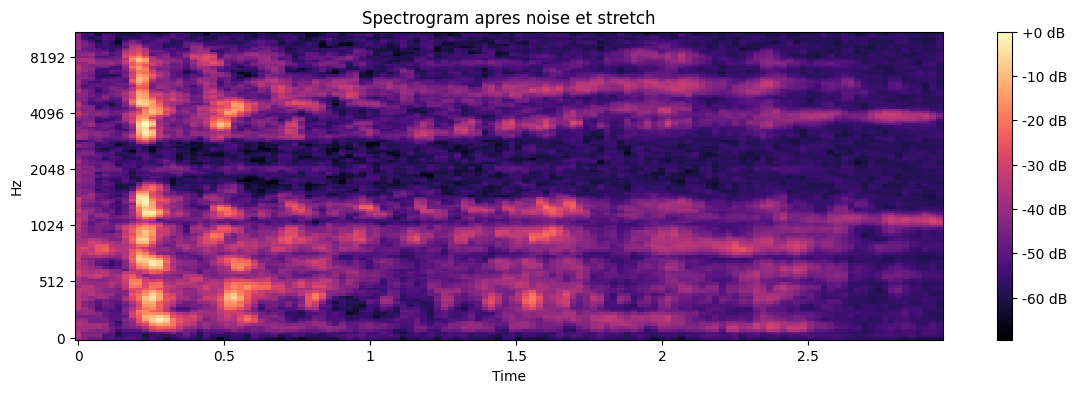

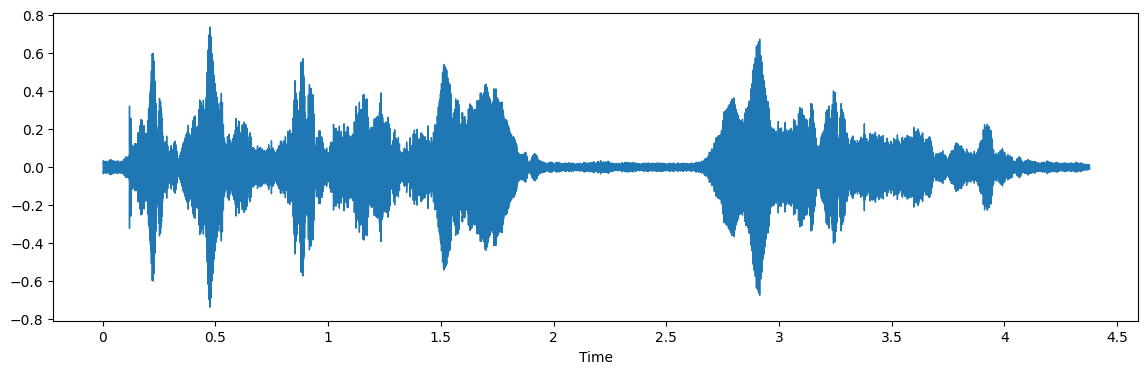

In [12]:
x = noise(data0)
x = stretch(x)
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr)
spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
spectrogram = spectrogram.T
plt.figure(figsize=(14, 4))
librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram apres noise et stretch')
plt.show()
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

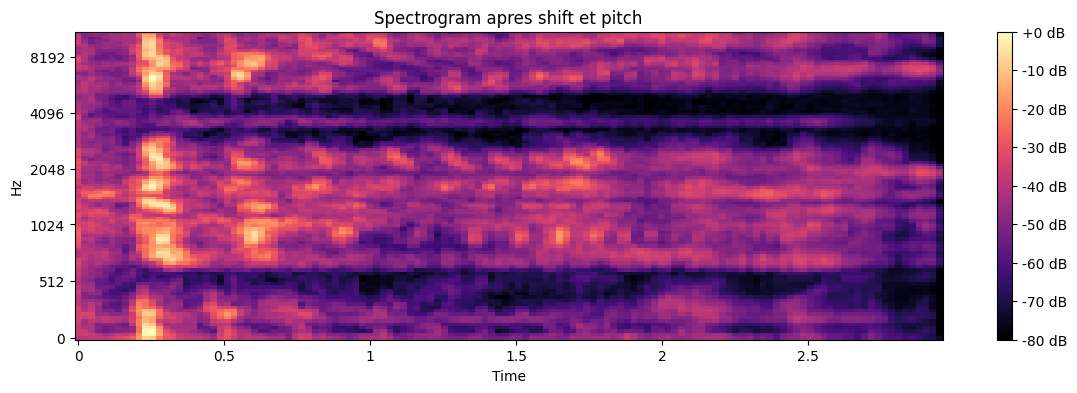

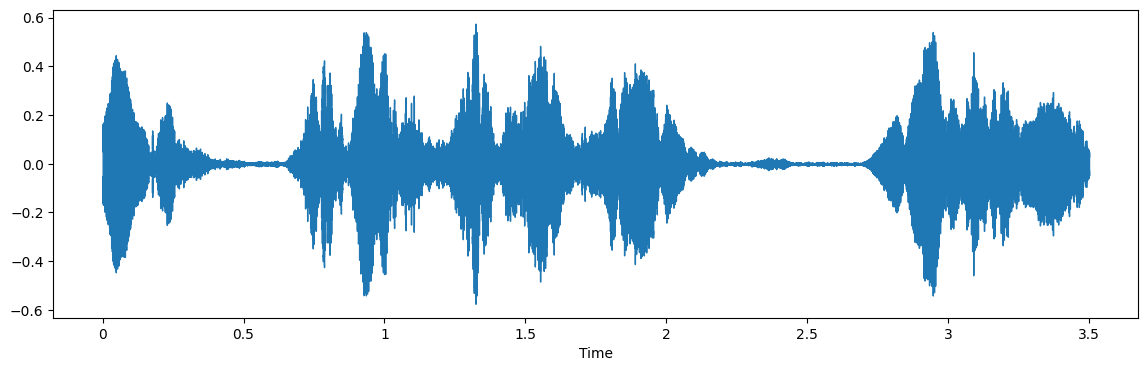

In [13]:
x = shift(data0)
x = pitch(x, sample_rate)
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr)
spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
spectrogram = spectrogram.T
plt.figure(figsize=(14, 4))
librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram apres shift et pitch')
plt.show()
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

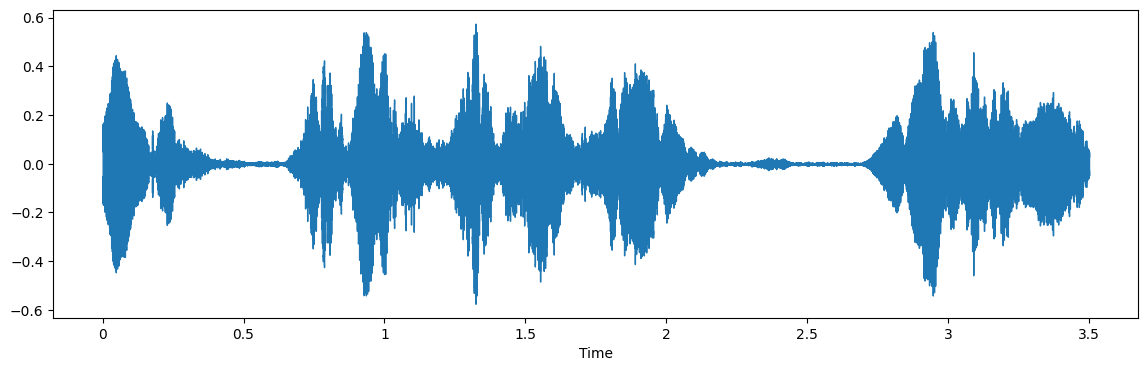

In [14]:

plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

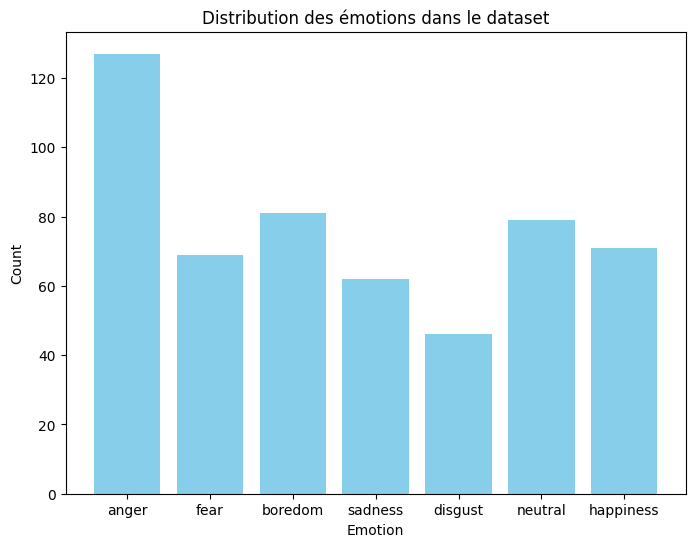

In [15]:
emotions_labels = [label[5] for label in target_labels]
emotion_values = [emotion_map.get(emotion, "Unknown") for emotion in emotions_labels]
emotion_counts = Counter(emotion_values)
plt.figure(figsize=(8, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution des émotions dans le dataset')
plt.show()

In [18]:
"""import os
import numpy as np
import librosa
import soundfile as sf

output_folder = "dataset_augmente"

# Créer le dossier de sortie s'il n'existe pas
os.makedirs(output_folder, exist_ok=True)

# Fonctions d'augmentation
def noise(data, noise_rate=0.01):
    noise_amp = noise_rate * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def pitch(data, sampling_rate, pitch_factor=2.0):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)
augmented_audio_file_tab = []
# Parcourir les fichiers dans la liste
for filepath in audio_file_tab:
    # Charger le fichier audio
    data, sampling_rate = librosa.load(filepath, sr=None)

    # Générer les fichiers augmentés
    augmented_files = {
        "bruit": noise(data),
        "stretch": stretch(data),
        "pitch": pitch(data, sampling_rate)
    }

    base_name = os.path.basename(filepath)
    original_output_filename = f"{os.path.splitext(base_name)[0]}_original.wav"
    original_output_path = os.path.join(output_folder, original_output_filename)
    sf.write(original_output_path, data, sampling_rate)
    
    # Sauvegarder les fichiers augmentés
    for augment_type, augmented_data in augmented_files.items():
        base_name = os.path.basename(filepath)
        output_filename = f"{os.path.splitext(base_name)[0]}_{augment_type}.wav"
        output_path = os.path.join(output_folder, output_filename)
        sf.write(output_path, augmented_data, sampling_rate)
        augmented_audio_file_tab.append(output_path)

print(f"Augmentation terminée. Les fichiers sont enregistrés dans {output_folder}.")
"""

Augmentation terminée. Les fichiers sont enregistrés dans dataset_augmente.


In [ ]:
#transformer chaque signal en mfcc
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

def extract_features(data, sr, frame_length=2048, hop_length=512):
    result = np.array([])
    
    result = np.hstack((result,
                        mfcc(data, sr, frame_length, hop_length)
                                    ))
    return result

# Fonction d'augmentation des données pour le modèle
def get_features(path):
    # La durée et le décalage sont utilisés pour traiter les cas où il n'y a pas de son au début et à la fin de chaque fichier audio, comme expliqué ci-dessus.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # Données originales (sans modification)
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)
    
    # Données avec bruit ajouté
    noise_data = noise(data)  # Ajout de bruit
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2))  # Empilement des résultats
    
    # Données avec modification de la hauteur (pitch)
    data_pitch = pitch(data, sample_rate)  # Modification de la hauteur
    res3 = extract_features(data_pitch, sample_rate)
    result = np.vstack((result, res3))  # Empilement des résultats
    
    # Données avec bruit et modification de la hauteur combinés
    data_noise_pitch = noise(data_pitch)  # Ajout de bruit après modification de la hauteur
    res4 = extract_features(data_noise_pitch, sample_rate)
    result = np.vstack((result, res4))  # Empilement des résultats
    
    return result


X, Y = [], []
for path, emotion in zip(audio_file_tab, emotion_tab):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [50]:
path_repeated = [path for path in audio_file_tab for _ in range(4)]
#print(path_repeated)

In [51]:
Features = pd.DataFrame(X)
Features['labels'] = Y
#Features.to_csv('features.csv', index=False)
Features.head(20)
Features['Path'] = path_repeated
Features.shape

(2140, 2162)

## Deep Learning 

In [59]:


encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
print(Y)
print(encoder)
print(encoder.classes_)

input_shape = (2160,)
num_classes = 7
num_epochs = 50
batch_size = 256

class AudioModel(nn.Module):
    def __init__(self, input_shape, num_classes):
        super(AudioModel, self).__init__()
        self.conv1 = nn.Conv1d(1, 256, kernel_size=5, stride=1, padding=2)
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)
        self.conv2 = nn.Conv1d(256, 256, kernel_size=5, stride=1, padding=2)
        self.pool2 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)
        self.conv3 = nn.Conv1d(256, 128, kernel_size=5, stride=1, padding=2)
        self.pool3 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)
        self.dropout1 = nn.Dropout(0.2)
        self.conv4 = nn.Conv1d(128, 64, kernel_size=5, stride=1, padding=2)
        self.pool4 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(8640, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = nn.functional.relu(x)
        x = self.pool3(x)
        x = self.dropout1(x)
        x = self.conv4(x)
        x = nn.functional.relu(x)
        x = self.pool4(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x
    
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

Features = Features.fillna(0)
X = Features.iloc[:, :-1].select_dtypes(include=[np.number]).values
Y = Features['labels'].values
print(X)
print(Y)

#Initialisation modèle
model = AudioModel(input_shape, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

print(model)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

total_params = count_parameters(model)
print(f"Total number of parameters: {total_params}")



[0 0 0 ... 5 5 5]
LabelEncoder()
['anger' 'boredom' 'disgust' 'fear' 'happiness' 'neutral' 'sadness']
cuda
[[-171.99945068  100.80108643  -37.58799362 ...   -2.71249819
   -34.12957001  -12.83475685]
 [-155.19291551   77.10133289  -17.02366208 ...   -2.48693458
   -35.89475463  -12.65531609]
 [-165.44340515   87.37991333  -29.23184586 ...  -42.96131134
     0.75147969   23.24108315]
 ...
 [-319.42365237   63.52613666   31.96386506 ...    0.
     0.            0.        ]
 [-341.88912964  114.55563354  -22.62065887 ...    0.
     0.            0.        ]
 [-321.9785688    90.01779699   -4.21772724 ...    0.
     0.            0.        ]]
['anger' 'anger' 'anger' ... 'neutral' 'neutral' 'neutral']
AudioModel(
  (conv1): Conv1d(1, 256, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool1): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (conv2): Conv1d(256, 256, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool2): MaxPool1d(kernel_size=5, stride=2, paddi

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.utils.data as data

Features = Features.fillna(0)

X_train, X_test, Y_train, Y_test, train_path, test_path = train_test_split(X, Y, path_repeated, test_size=0.2, random_state=42)


# Convertir les données en float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Convertir les labels en entiers
Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.transform(Y_test)

# Convertir en tenseurs PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
Y_train = torch.tensor(Y_train, dtype=torch.long).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
Y_test = torch.tensor(Y_test, dtype=torch.long).to(device)

# Création de DataLoaders
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train.unsqueeze(1), Y_train), batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_test.unsqueeze(1), Y_test), batch_size=batch_size, shuffle=False)

loss_tab = []

#Entrainement
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    
    for inputs, targets in train_loader:      
        # Forward pass
        outputs = model(inputs)  
        loss = criterion(outputs, targets)
        
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    loss_element = total_loss/len(train_loader)
    loss_tab.append(loss_element)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss_element:.4f}")

Epoch 1/50, Loss: 31.8257
Epoch 2/50, Loss: 2.0198
Epoch 3/50, Loss: 1.8863
Epoch 4/50, Loss: 1.7666
Epoch 5/50, Loss: 1.5027
Epoch 6/50, Loss: 1.5331
Epoch 7/50, Loss: 1.3290
Epoch 8/50, Loss: 1.1094
Epoch 9/50, Loss: 1.0005
Epoch 10/50, Loss: 0.8906
Epoch 11/50, Loss: 0.8081
Epoch 12/50, Loss: 0.7207
Epoch 13/50, Loss: 0.7496
Epoch 14/50, Loss: 0.6826
Epoch 15/50, Loss: 0.6403
Epoch 16/50, Loss: 0.5594
Epoch 17/50, Loss: 0.5116
Epoch 18/50, Loss: 0.4497
Epoch 19/50, Loss: 0.3968
Epoch 20/50, Loss: 0.3613
Epoch 21/50, Loss: 0.3022
Epoch 22/50, Loss: 0.2591
Epoch 23/50, Loss: 0.2881
Epoch 24/50, Loss: 0.2402
Epoch 25/50, Loss: 0.2057
Epoch 26/50, Loss: 0.1972
Epoch 27/50, Loss: 0.1813
Epoch 28/50, Loss: 0.1486
Epoch 29/50, Loss: 0.1295
Epoch 30/50, Loss: 0.1089
Epoch 31/50, Loss: 0.1200
Epoch 32/50, Loss: 0.1043
Epoch 33/50, Loss: 0.0984
Epoch 34/50, Loss: 0.0896
Epoch 35/50, Loss: 0.1107
Epoch 36/50, Loss: 0.0680
Epoch 37/50, Loss: 0.0725
Epoch 38/50, Loss: 0.1966
Epoch 39/50, Loss: 0

## Evaluation et Tests

In [54]:
model.eval()
results = []
correct = 0
total = 0


emotion_labels = ['anger', 'boredom', 'disgust', 'fear', 'happiness', 'neutral', 'sadness']

with torch.no_grad():
    for i, (inputs, targets) in enumerate(test_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        
        batch_start = i * test_loader.batch_size
        batch_end = batch_start + inputs.size(0)
        batch_paths = test_path[batch_start:batch_end]
        
        outputs = model(inputs)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()
        _, predicted = torch.max(outputs, 1)
        
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        
        for i in range(inputs.size(0)):
            results.append({
            'file_name': batch_paths[i],  # Obtenir le fichier audio
            'real_emotion': emotion_labels[targets[i].item()],
            'predicted_emotion': emotion_labels[predicted[i].item()],
            'probabilities': {emotion: prob for emotion, prob in zip(emotion_labels, probabilities[i])}
            })
print(total)
print(correct)
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


428
411
Test Accuracy: 96.03%


In [55]:
choix = random.randint(0, len(results)-1)


audio0 = results[choix]['file_name']
emo = results[choix]['real_emotion']
predicted_emo = results[choix]['predicted_emotion']
proba = results[choix]['probabilities']
print(f"Audio aléatoire, émotion: {emo}")
Audio(audio0)
print(f"le modèle a prédit: {predicted_emo}, voici la distribution de probabilités pour chaque émotion: ")
print(proba)
for file in audio_file_tab:
    if file == audio0:
        a = file
print(audio0)
print(a)
Audio(a)


Audio aléatoire, émotion: boredom
le modèle a prédit: boredom, voici la distribution de probabilités pour chaque émotion: 
{'anger': 1.4140365e-17, 'boredom': 0.9951125, 'disgust': 3.0804364e-07, 'fear': 1.0577715e-11, 'happiness': 2.5614508e-10, 'neutral': 0.004887152, 'sadness': 1.7906587e-10}
./wav/03b02La.wav
./wav/03b02La.wav


## Interprétation et Analyse

## Adaptation de MocoV3

In [23]:
import librosa
import librosa.display
import numpy as np
import torchaudio
from torch.utils.data import Dataset
from torchvision.transforms.functional import resize
import torchvision.transforms as transforms

DISTRIBUTED = None

################################################################
#
#adapter l'augmentation des données (par paire d'audio original)
#
################################################################
def augment_audio(data, sampling_rate, augment_type):
    """
    Applique les augmentations spécifiées sur un fichier audio.
    
    Args:
    - data: Le signal audio (1D NumPy array).
    - sampling_rate: La fréquence d'échantillonnage du signal.
    - augment_type: Type d'augmentation ("noise_stretch" ou "shift_pitch").
    
    Returns:
    - Le signal audio transformé.
    """
    if augment_type == "noise_stretch":
        data = noise(data)
        data = stretch(data)
    elif augment_type == "shift_pitch":
        data = shift(data)
        data = pitch(data, sampling_rate)
    return data


class AudioDataset(Dataset):
    def __init__(self, file_paths, sr=16000, n_fft=1024, hop_length=512, transform=None):
        """
        Dataset pour charger des fichiers audio et générer des spectrogrammes augmentés.
        
        Args:
        - file_paths (list): Liste des chemins vers les fichiers audio.
        - sr (int): Fréquence d'échantillonnage (par défaut 16 kHz).
        - n_fft (int): Taille de la fenêtre FFT pour les spectrogrammes.
        - hop_length (int): Décalage entre les fenêtres FFT.
        - transform (callable, optional): Transformations supplémentaires (normalisation, etc.).
        """
        self.file_paths = file_paths
        self.sr = sr
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        # Charger le fichier audio
        file_path = self.file_paths[idx]
        waveform, sr = torchaudio.load(file_path)
        waveform = waveform[0].numpy()  # Convertir en NumPy array

        # Appliquer les augmentations
        augment1 = augment_audio(waveform, sr, "noise_stretch")
        augment2 = augment_audio(waveform, sr, "shift_pitch")

        # Convertir chaque augmentation en spectrogramme
        spectrogram1 = self._compute_spectrogram(augment1, sr)
        spectrogram2 = self._compute_spectrogram(augment2, sr)
        
        spectrogram1 = resize(torch.tensor(spectrogram1), [224, 224])
        spectrogram2 = resize(torch.tensor(spectrogram2), [224, 224])
        
        spectrogram1 = spectrogram1.unsqueeze(0)
        spectrogram2 = spectrogram2.unsqueeze(0)

        # Appliquer des transformations supplémentaires si nécessaires
        if self.transform:
            spectrogram1 = self.transform(spectrogram1)
            spectrogram2 = self.transform(spectrogram2)

        return spectrogram1, spectrogram2

    def _compute_spectrogram(self, data, sr):
        """
        Convertit un signal audio en spectrogramme.
        
        Args:
        - data (np.array): Signal audio brut.
        - sr (int): Fréquence d'échantillonnage.
        
        Returns:
        - np.array: Spectrogramme 3D (3 canaux, Hauteur, Largeur).
        """
        # Calcul du spectrogramme
        spectrogram = librosa.stft(data, n_fft=self.n_fft, hop_length=self.hop_length)
        spectrogram = np.abs(spectrogram)  
        spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
        spectrogram_3d = np.stack([spectrogram_db] * 3, axis=0)  # [3, Hauteur, Largeur]
          
        return spectrogram_3d

################################################################
#
#changer les loader (ligne 290 -> 302 de main_moco) et loader.py
#
################################################################

normalize = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_dataset = AudioDataset(audio_file_tab, sr=16000, n_fft=1024, hop_length=512, transform=normalize)
    
if DISTRIBUTED:
    train_sampler = torch.utils.data.distributed.DistributedSampler(train_dataset)
else:
    train_sampler = None
    
train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=32,
        shuffle=True,
        num_workers=0,
        pin_memory=True,
        sampler=train_sampler, 
        drop_last=True)



In [24]:
for images, _ in train_loader:
    # Déplacer tout le batch sur le GPU
    images = images.to('cuda')
    print(f"Image[0] device: {images[0].device}")
    print(f"Image[1] device: {images[1].device}")
    break  # Pour ne prendre qu'un lot (batch) d'images


Image[0] device: cuda:0
Image[1] device: cuda:0


In [25]:
for images, _ in train_loader:
    print(len(images))
    print(f"Image[0] device: {images[0].device}")
    print(f"Image[1] device: {images[1].device}")
    images[0] = images[0].to('cuda')
    images[1] = images[1].to('cuda')
    print(f"Image[0] device: {images[0].device}")
    print(f"Image[1] device: {images[1].device}")
    break  # Pour ne prendre qu'un lot (batch) d'images


32
Image[0] device: cpu
Image[1] device: cpu
Image[0] device: cpu
Image[1] device: cpu


In [26]:
for i in range(2):  # Afficher 2 exemples
    (augment1, augment2), idx = train_dataset[i]
    print(f"Exemple {i}:")
    
    # Affichage des spectrogrammes
    plt.figure(figsize=(10, 4))
    
    # Spectrogramme 1
    plt.subplot(1, 2, 1)
    librosa.display.specshow(augment1, x_axis='time', y_axis='log')
    plt.title(f"Spectrogramme Augmentation 1 (Exemple {i})")
    plt.colorbar(format='%+2.0f dB')
    
    # Spectrogramme 2
    plt.subplot(1, 2, 2)
    librosa.display.specshow(augment2, x_axis='time', y_axis='log')
    plt.title(f"Spectrogramme Augmentation 2 (Exemple {i})")
    plt.colorbar(format='%+2.0f dB')
    
    plt.tight_layout()
    plt.show()

ValueError: not enough values to unpack (expected 2, got 1)